In [1]:
# Install this to geohash lat/log

# !! pip install python-geohash

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pickle import Pickler, Unpickler
import seaborn as sns
import Geohash

In [2]:
# df_1 = pd.read_csv('./crime-data-in-brazil/RDO_1.csv')
# df_2 = pd.read_csv('./crime-data-in-brazil/RDO_2.csv')
# df_3 = pd.read_csv('./crime-data-in-brazil/RDO_3.csv')

# df_rdo = pd.concat([df_1, df_2, df_3])

# f = open('./df_rdo.sav', 'wb')
# Pickler(f).dump(df_rdo)
# f.close()

In [3]:
df_rdo = Unpickler(open('./df_rdo.sav', 'rb')).load()

In [4]:
list(df_rdo)

['ID_DELEGACIA',
 'NOME_DEPARTAMENTO',
 'NOME_SECCIONAL',
 'NOME_DELEGACIA',
 'CIDADE',
 'ANO_BO',
 'NUM_BO',
 'NOME_DEPARTAMENTO_CIRC',
 'NOME_SECCIONAL_CIRC',
 'NOME_DELEGACIA_CIRC',
 'NOME_MUNICIPIO_CIRC',
 'DESCR_TIPO_BO',
 'DATA_OCORRENCIA_BO',
 'HORA_OCORRENCIA_BO',
 'DATAHORA_COMUNICACAO_BO',
 'FLAG_STATUS',
 'RUBRICA',
 'DESCR_CONDUTA',
 'DESDOBRAMENTO',
 'DESCR_TIPOLOCAL',
 'DESCR_SUBTIPOLOCAL',
 'LOGRADOURO',
 'NUMERO_LOGRADOURO',
 'LATITUDE',
 'LONGITUDE',
 'DESCR_TIPO_PESSOA',
 'FLAG_VITIMA_FATAL',
 'SEXO_PESSOA',
 'IDADE_PESSOA',
 'COR_CUTIS',
 'Unnamed: 30']

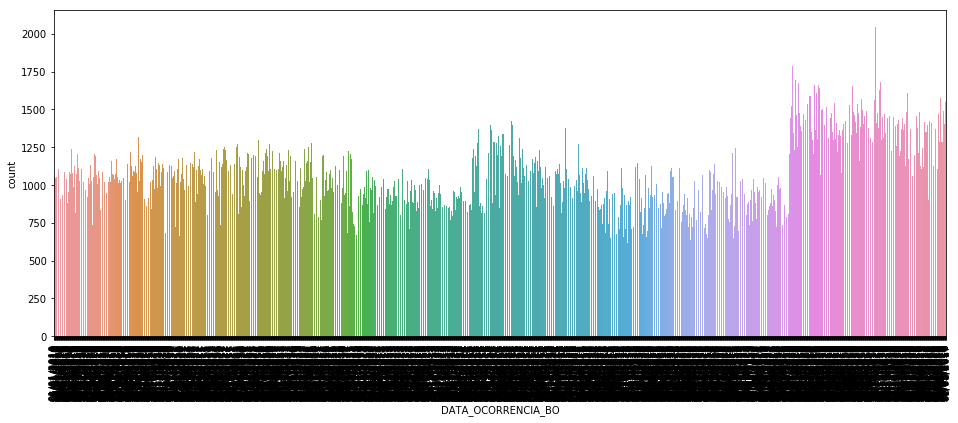

In [29]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.countplot(x=df_rdo['DATA_OCORRENCIA_BO'], data=df_rdo)

In [38]:
df_rdo['ANO_MES'] = pd.to_datetime(df_rdo['DATA_OCORRENCIA_BO']).map(lambda x: x.strftime('%Y-%m'))

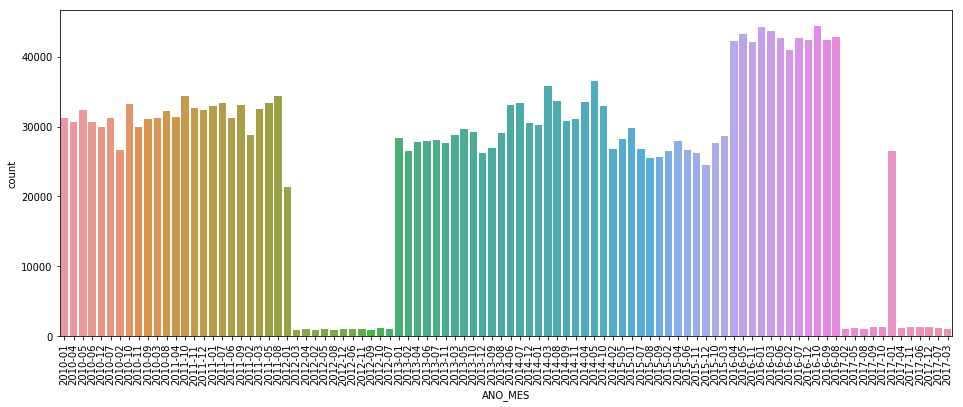

In [41]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.countplot(x=df_rdo['ANO_MES'], data=df_rdo)

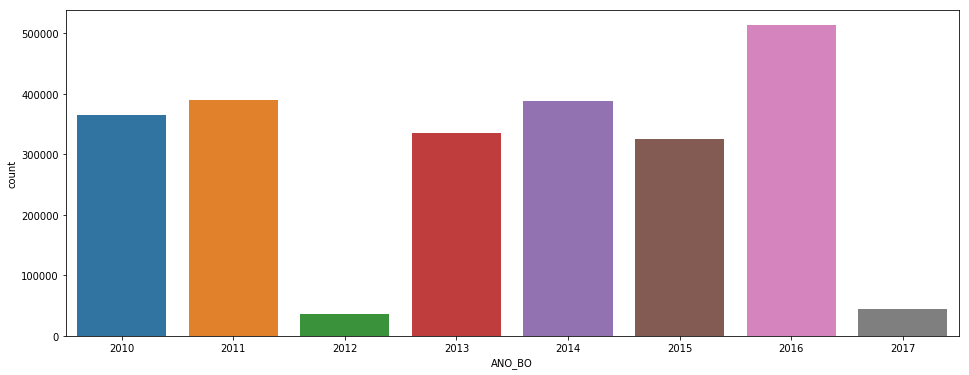

In [30]:
plt.figure(figsize=(16, 6))
sns.countplot(x=df_rdo['ANO_BO'], data=df_rdo)

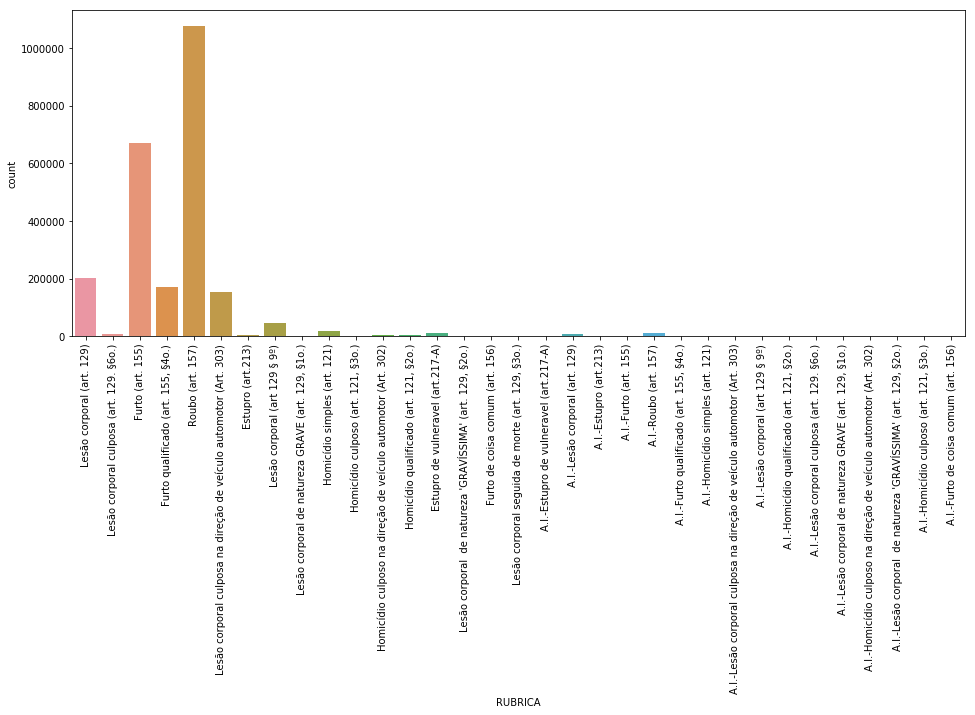

In [19]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
a = sns.countplot(x=df_rdo['RUBRICA'], data=df_rdo)

In [3]:
df_rdo['LOGRADOURO'].value_counts()

Informação protegida (art 31 LAI)           169356
AVENIDA PAULISTA                              8331
AV SAPOPEMBA                                  6605
RUA AUGUSTA                                   5548
AVENIDA SAPOPEMBA                             5433
RUA VINTE E CINCO DE MARCO                    5203
AV DAS NACOES UNIDAS                          5036
AVENIDA CRUZEIRO DO SUL                       4933
AV MAL TITO                                   4891
AV CRUZEIRO DO SUL                            4613
EST DE ITAPECERICA                            4612
EST DO M BOI MIRIM                            4517
RODOVIA RAPOSO TAVARES                        4478
AV SEN TEOTONIO VILELA                        4325
AVENIDA MARECHAL TITO                         4121
AVENIDA SENADOR TEOTONIO VILELA               4098
AV PAULISTA                                   4025
AV DO ESTADO                                  3998
AV RAIMUNDO PEREIRA DE MAGALHAES              3844
AV ARICANDUVA                  

In [4]:
df_rdo['NUMERO_LOGRADOURO'].value_counts()

0                                    240177
Informação protegida (art 31 LAI)    169356
1                                     69284
100                                   68058
0.0                                   44642
200                                   28005
10                                    26346
1000                                  22830
500                                   21756
300                                   17632
50                                    15950
2000                                  12814
1.0                                   12019
100.0                                 11881
400                                   10932
20                                     9791
150                                    9280
1500                                   9092
600                                    8700
3000                                   8559
800                                    8086
1200                                   7399
1800                            

In [5]:
def create_geohash(df):
    df["GEOHASH"] = df.apply(lambda x: Geohash.encode(x["LATITUDE"],x["LONGITUDE"],precision=5), axis = 1)
    return df

In [16]:
def limpeza_dados(df_rdo):
    df = df_rdo[['ANO_BO',
     'DATA_OCORRENCIA_BO',
     'HORA_OCORRENCIA_BO',
     'FLAG_STATUS',
     'RUBRICA',
     'LOGRADOURO',
     'LATITUDE',
     'LONGITUDE',
     'DESCR_TIPO_PESSOA',
     'FLAG_VITIMA_FATAL',
     'SEXO_PESSOA',
     'IDADE_PESSOA',
     'COR_CUTIS']]
    print(df.shape)

    ## dropando linhas com NA na latitude ou longitude
    df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
    # dropando linhas com "Informação protegida (art 31 LAI)" na latitude ou longitude
    df = df.loc[(df['LATITUDE'] != "Informação protegida (art 31 LAI)")]

    df['LATITUDE'] = pd.to_numeric(df['LATITUDE'])
    df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])

    ## removendo Latitude erradas
    df = df.loc[(df['LATITUDE'] >= -50) & (df['LATITUDE'] <= 0)]
    ## removendo Longitudes erradas
    df = df.loc[(df['LONGITUDE'] >= -60) & (df['LONGITUDE'] <= 0)]

    print(df.shape)
    return(df)

In [12]:
df = create_geohash(df)
df.head()
# f = open('./df_rdo.sav', 'wb')
# Pickler(f).dump(df_rdo)
# f.close()

,ANO_BO,DESCR_TIPO_BO,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,DATAHORA_COMUNICACAO_BO,FLAG_STATUS,RUBRICA,LOGRADOURO,LATITUDE,LONGITUDE,DESCR_TIPO_PESSOA,FLAG_VITIMA_FATAL,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS,GEOHASH
749,2011,Boletim de Ocorrência,04/01/2011,15:10,NaN,Consumado,Furto (art. 155),EST.BARRA FUNDA - STAND TELEFONICA,-23.532377,-46.672896,Vítima,NaN,F,28,Branca,6gyf1
750,2011,Boletim de Ocorrência,10/01/2011,08:10,NaN,Consumado,Furto (art. 155),ESTACAO BARRA FUNDA(CPTM),-23.524103,-46.665157,Vítima,NaN,M,61,Branca,6gyf4
751,2011,Boletim de Ocorrência,10/01/2011,08:30,NaN,Consumado,Roubo (art. 157),ESTACAO BARRA FUNDA DO METRO,-23.524103,-46.665157,Vítima,NaN,F,20,Branca,6gyf4
752,2011,Boletim de Ocorrência,11/01/2011,10:00,NaN,Consumado,"Furto qualificado (art. 155, §4o.)",LARGO SAO BENTO,-23.544366,-46.634206,Vítima,NaN,M,42,Branca,6gyf4
753,2011,Boletim de Ocorrência,12/01/2011,06:40,NaN,Consumado,Furto (art. 155),ESTACAO BARRA FUNDA - CPTM,-23.533477,-46.652670,Vítima,NaN,M,37,Parda,6gyf4


In [12]:
## Para carregar o dataframe a partir deste ponto
df = Unpickler(open('./rdo_clean.sav', 'rb')).load()

In [5]:
df['GEOHASH'].unique()

array(['6gyf1', '6gyf4', '6gyfj', '6gycc', '6gycf', '6gyfh', '6gyc3',
       '6gyf5', '6gyf7', '6gycg', '6gycd', '6gyfn', '6gyf8', '6gyc8',
       '6gyce', '6gyfp', '6gyc6', '6gyfb', '6gyc2', '6gyc9', '6gyf0',
       '6gy9p', '6gyf2', '6gyf3', '6gycb', '6gycu', '6gydz', '6gyc4',
       '6gyfk', '6gyc1', '6gy9r', '6gz42', '6gyf6', '6gy9x', '6gydy',
       '6gybc', '6gyb2', '6gycw', '6gybb', '6gycv', '6gydw', '6gyc0',
       '6gztt', '6gyct', '6gygh', '6gy9z', '6gycs', '6gyf9', '6gyfq',
       '6gydx', '6gyfr', '6gy9y', '6gycz', '6gyb8', '6gycy', '6gz40',
       '6gyfd', '6gydr', '6gycx', '6gyc7', '6gyfe', '6gyfs', '6gz18',
       '6gybf', '6gy8z', '6gydn', '6gyfm', '6gyfu', '6gz1b', '6gydh',
       '6gycr', '6gydp', '6gyb9', '6gytf', '6gy8p', '6gyb0', '6gyd5',
       '6gwzf', '6gyb1', '6gyb4', '6gwzc', '6gyb3', '6gymr', '6gy8r',
       '6gwxx', '6gwxz', '6gy8x', '6gwxy', '6gyft', '6gycq', '6gyc5',
       '6gz43', '6gy9v', '6gyt9', '6gydj', '6gydq', '6gybd', '6gymm',
       '6gy9q', '6gy

In [23]:
df['GEOHASH'].value_counts()

6gyf4    175235
6gycf     94989
6gyf5     75626
6gycc     55942
6gyfh     55617
6gyc6     50905
6gycd     48960
6gyf3     48836
6gyfp     47954
6gyf1     47646
6gyc3     46059
6gyfn     46001
6gyce     44070
6gycg     43385
6gycv     39539
6gyfj     39454
6gyf6     38761
6gyf7     38628
6gycu     37786
6gyc2     36801
6gy9r     35933
6gyc9     35122
6gycw     34948
6gycb     33220
6gyfr     31191
6gyc8     28390
6gybc     27013
6gycy     26657
6gyf2     26369
6gyf0     26267
          ...  
6gymv         1
6gykm         1
6uj3r         1
6uhtz         1
6gtux         1
6un6b         1
6u5t3         1
6gyet         1
6u55q         1
6unth         1
6gz74         1
6gz5j         1
6gyuk         1
6gyw0         1
6u55s         1
6gy6u         1
6gzt7         1
e2p0h         1
6gysd         1
e2p24         1
6gvcy         1
6uhqh         1
6gvep         1
6gy4p         1
6gydv         1
6ujpu         1
6gy8w         1
6gz47         1
6gzkw         1
6unpb         1
Name: GEOHASH, Length: 2

In [14]:
def generalize_rubrica(df):
    
    furto = ['Furto (art. 155)', 
             'Furto de coisa comum (art. 156)',
             'Furto qualificado (art. 155, §4o.)',
            'A.I.-Furto de coisa comum (art. 156)',
            'A.I.-Furto (art. 155)',
            'A.I.-Furto qualificado (art. 155, §4o.)',
            'FURTO']

    roubo = ['Roubo (art. 157)', 'A.I.-Roubo (art. 157)']

    homicidio = ['Homicídio culposo (art. 121, §3o.)',
                 'Homicídio culposo/veículo(Art. 302)',
                 'Homicídio qualificado (art. 121, §2o.)',
                 'Homicídio simples (art. 121)',
                'Homicídio culposo na direção de veículo automotor (Art. 302)',
                'A.I.-Homicídio simples (art. 121)',
                'A.I.-Homicídio qualificado (art. 121, §2o.)',
                'A.I.-Homicídio culposo na direção de veículo automotor (Art. 302)',
               'A.I.-Homicídio culposo (art. 121, §3o.)']

    lesao_corporal = ['A.I.-Lesão corporal (art. 129)',
                      'Lesão corp GRAVÍSSIMA (art. 129, §2o.)',
                      'Lesão corporal (art 129 § 9º)',
                      'Lesão corporal (art. 129)',
                      'Lesão corporal culposa (art. 129. §6o.)',
                      'Lesão corp culposa/veículo(Art. 303)',
                      'Lesão corporal GRAVE (art. 129, §1o.)',
                      'Lesão corporal seguida de morte (art. 129, §3o.)',
                     'Lesão corporal de natureza GRAVE (art. 129, §1o.)',
                     'Lesão corporal culposa na direção de veículo automotor (Art. 303)',
                     "Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
                     'A.I.-Lesão corporal culposa (art. 129. §6o.)',
                     'A.I.-Lesão corporal culposa na direção de veículo automotor (Art. 303)',
                       'A.I.-Lesão corporal (art 129 § 9º)',
                       'A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)',]

    estupro = ['A.I.-Estupro de vulneravel (art.217-A)',
               'Estupro (art.213)',
               'Estupro de vulneravel (art.217-A)',
               'A.I.-Estupro (art.213)',]

    trafico = ['Drogas (Art.33, caput)',
               'Induzir uso de droga(Art.33,§2º)',
               'Oferecer droga(Art.33,§3º)',
               'Porte de entorpecente (Art. 16)',
               'Porte de objeto destinado à fabricação de entorpecente (Art. 13)',
               'Tráfico de entorpecente (Art. 12)']
    
    df.loc[df['RUBRICA'].isin(furto), 'RUBRICA'] = 'Furto'
    df.loc[df['RUBRICA'].isin(roubo), 'RUBRICA'] = 'Roubo'
    df.loc[df['RUBRICA'].isin(homicidio), 'RUBRICA'] = 'Homicídio'
    df.loc[df['RUBRICA'].isin(lesao_corporal), 'RUBRICA'] = 'Lesão Corporal'
    df.loc[df['RUBRICA'].isin(estupro), 'RUBRICA'] = 'Estupro'
    df.loc[df['RUBRICA'].isin(trafico), 'RUBRICA'] = 'Tráfico'
    
    return(df)

In [41]:
def separate_ano_mes_dia_hora_min(df):
    
    df['ANO'] = pd.to_datetime(df['DATA_OCORRENCIA_BO']).map(lambda x: x.strftime('%Y'))
    df['MES'] = pd.to_datetime(df['DATA_OCORRENCIA_BO']).map(lambda x: x.strftime('%m'))
    df['DIA'] = pd.to_datetime(df['DATA_OCORRENCIA_BO']).map(lambda x: x.strftime('%d'))
    df['HORA'] = df.HORA_OCORRENCIA_BO.str[:2]
    df['MINUTOS'] = df.HORA_OCORRENCIA_BO.str[3:5]
    df.head()
    return df

In [16]:
df = generalize_rubrica(df)

In [42]:
df = separate_ano_mes_dia_hora_min(df)

In [21]:
df['DESCR_TIPO_PESSOA'].value_counts()

Boletim de Ocorrência                       1772713
Termo Circunstanciado                         10634
Name: DESCR_TIPO_BO, dtype: int64

In [45]:
df.head()

,ANO_BO,DESCR_TIPO_BO,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,DATAHORA_COMUNICACAO_BO,FLAG_STATUS,RUBRICA,LOGRADOURO,LATITUDE,LONGITUDE,...,FLAG_VITIMA_FATAL,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS,GEOHASH,ANO,MES,DIA,HORA,MINUTOS
749,2011,Boletim de Ocorrência,04/01/2011,15:10,NaN,Consumado,Furto,EST.BARRA FUNDA - STAND TELEFONICA,-23.532377,-46.672896,...,NaN,F,28,Branca,6gyf1,2011,04,01,15,10
750,2011,Boletim de Ocorrência,10/01/2011,08:10,NaN,Consumado,Furto,ESTACAO BARRA FUNDA(CPTM),-23.524103,-46.665157,...,NaN,M,61,Branca,6gyf4,2011,10,01,08,10
751,2011,Boletim de Ocorrência,10/01/2011,08:30,NaN,Consumado,Roubo,ESTACAO BARRA FUNDA DO METRO,-23.524103,-46.665157,...,NaN,F,20,Branca,6gyf4,2011,10,01,08,30
752,2011,Boletim de Ocorrência,11/01/2011,10:00,NaN,Consumado,Furto,LARGO SAO BENTO,-23.544366,-46.634206,...,NaN,M,42,Branca,6gyf4,2011,11,01,10,00
753,2011,Boletim de Ocorrência,12/01/2011,06:40,NaN,Consumado,Furto,ESTACAO BARRA FUNDA - CPTM,-23.533477,-46.652670,...,NaN,M,37,Parda,6gyf4,2011,12,01,06,40


In [46]:

df = df.drop(columns=['ANO_BO', 'DESCR_TIPO_PESSOA', 'HORA_OCORRENCIA_BO', 'DATA_OCORRENCIA_BO', 'DESCR_TIPO_BO', 'DATAHORA_COMUNICACAO_BO', 'FLAG_STATUS', 'LOGRADOURO', 'FLAG_VITIMA_FATAL'])

In [4]:
df.head()

,RUBRICA,LATITUDE,LONGITUDE,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS,GEOHASH,ANO,MES,DIA,HORA,MINUTOS
749,Furto,-23.532377,-46.672896,F,28,Branca,6gyf1,2011,04,01,15,10
750,Furto,-23.524103,-46.665157,M,61,Branca,6gyf4,2011,10,01,08,10
751,Roubo,-23.524103,-46.665157,F,20,Branca,6gyf4,2011,10,01,08,30
752,Furto,-23.544366,-46.634206,M,42,Branca,6gyf4,2011,11,01,10,00
753,Furto,-23.533477,-46.652670,M,37,Parda,6gyf4,2011,12,01,06,40


In [2]:
# f = open('./df_rdo_clean2.sav', 'wb')
# Pickler(f).dump(df)
# f.close()
df = Unpickler(open('./df_rdo_clean2.sav', 'rb')).load()

In [3]:
def tratando_categoricos(df):
    df = pd.get_dummies(df, columns = ['RUBRICA', 'SEXO_PESSOA', 'COR_CUTIS'])
    return df

In [5]:
## Removendo valores invalidos de cor_cutis
cor_cutis_validos = ['19', '34', '37', '30', '25']
df.loc[df['COR_CUTIS'].isin(cor_cutis_validos), 'COR_CUTIS'] = 'Outros'

print(df.shape)
##
df = df.dropna(subset=['IDADE_PESSOA'])
df = df[pd.to_numeric(df['IDADE_PESSOA'], errors='coerce').notnull()]
df = df.loc[(df['IDADE_PESSOA'].astype(int) > 0) & (df['IDADE_PESSOA'].astype(int) < 130)]
print(df.shape)

(1783347, 12)
(1766045, 12)


In [6]:
df.head()

,RUBRICA,LATITUDE,LONGITUDE,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS,GEOHASH,ANO,MES,DIA,HORA,MINUTOS
749,Furto,-23.532377,-46.672896,F,28,Branca,6gyf1,2011,04,01,15,10
750,Furto,-23.524103,-46.665157,M,61,Branca,6gyf4,2011,10,01,08,10
751,Roubo,-23.524103,-46.665157,F,20,Branca,6gyf4,2011,10,01,08,30
752,Furto,-23.544366,-46.634206,M,42,Branca,6gyf4,2011,11,01,10,00
753,Furto,-23.533477,-46.652670,M,37,Parda,6gyf4,2011,12,01,06,40


In [7]:
df = tratando_categoricos(df)
df.head()

,LATITUDE,LONGITUDE,IDADE_PESSOA,GEOHASH,ANO,MES,DIA,HORA,MINUTOS,RUBRICA_Estupro,...,SEXO_PESSOA_,SEXO_PESSOA_F,SEXO_PESSOA_I,SEXO_PESSOA_M,COR_CUTIS_Amarela,COR_CUTIS_Branca,COR_CUTIS_Outros,COR_CUTIS_Parda,COR_CUTIS_Preta,COR_CUTIS_Vermelha
749,-23.532377,-46.672896,28,6gyf1,2011,04,01,15,10,0,...,0,1,0,0,0,1,0,0,0,0
750,-23.524103,-46.665157,61,6gyf4,2011,10,01,08,10,0,...,0,0,0,1,0,1,0,0,0,0
751,-23.524103,-46.665157,20,6gyf4,2011,10,01,08,30,0,...,0,1,0,0,0,1,0,0,0,0
752,-23.544366,-46.634206,42,6gyf4,2011,11,01,10,00,0,...,0,0,0,1,0,1,0,0,0,0
753,-23.533477,-46.652670,37,6gyf4,2011,12,01,06,40,0,...,0,0,0,1,0,0,0,1,0,0


In [8]:
# f = open('./df_rdo_categ.sav', 'wb')
# Pickler(f).dump(df)
# f.close()
df = Unpickler(open('./df_rdo_categ.sav', 'rb')).load()

In [10]:
df.shape

(1766045, 24)